In [24]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
import coopgcpbm.modeler.plotlib as pl

## 1. Analysis on d=4 for ETS1-ETS1
Since we want to get information about anticoop, I created a training data that retains all information (i.e., it includes the anticoop and fail_cutoff sequences).

In [3]:
train_ee = pd.read_csv("train_ets1_ets1_w_anticoop.tsv", sep="\t")
train_ee_d4 = train_ee[train_ee["distance"] == 4]

### 1.a. Consensus motif for d=4
It looks like ETS1-ETS1 d=4 follows a specific GGAAGGAA composite motif with differences in the flanking regions.

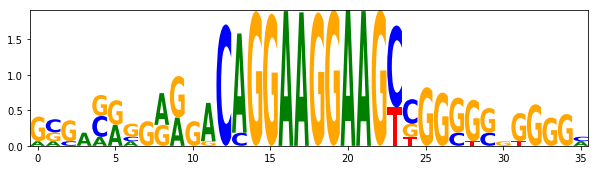

In [4]:
m = logomaker.alignment_to_matrix(train_ee_d4["Sequence"].tolist(), to_type="weight")
m[m < 0] = 0
logomaker.Logo(m)

Motifs from just the cooperative sequences are similar from the d=4 sequences in general

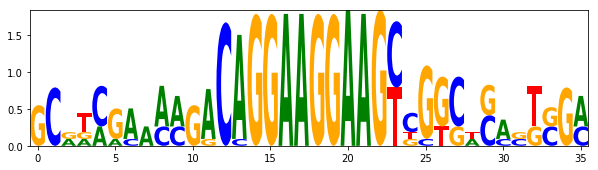

In [5]:
coop_ambiguous_seqs_d4 = train_ee_d4[train_ee_d4["label"] == "cooperative"]["Sequence"].tolist()
m = logomaker.alignment_to_matrix(coop_ambiguous_seqs_d4, to_type="weight")
m[m < 0] = 0
logomaker.Logo(m)

### 1.b. Label counts per orientation for d=4
Note that we converted all -/- into +/+

In [6]:
train_ee_d4[["orientation", "label"]].value_counts()

orientation  label          
+/+          cooperative        26
             fail_cutoff        24
             ambiguous          19
             independent        11
             anticooperative     2
-/+          ambiguous           1
+/-          fail_cutoff         1
dtype: int64

### 1.c. Binding site strength for d=4
Same conclusion as the general ETS1-ETS1 conclusion for the binding strength although it seems that the independent sequences have a very specific motifs for the stronger site,

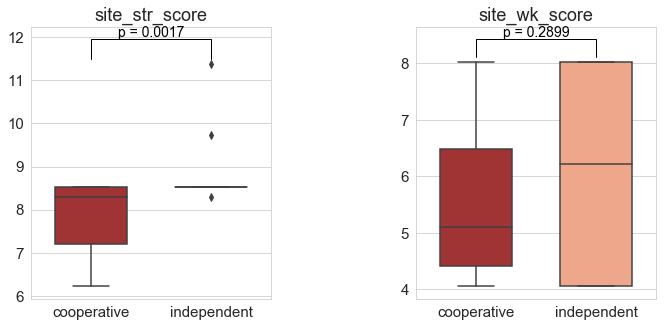

In [12]:
train_ee_d4_filtered = train_ee_d4[(train_ee_d4["label"] == "cooperative") | (train_ee_d4["label"] == "independent") ]
pl.plot_box_categories(train_ee_d4_filtered, incols=["site_str_score", "site_wk_score"], alternative="smaller", color = ["#b22222","#FFA07A"])
plt.show()

## 2. PWM binding scores vs ChIP-seq signals
Currently using all sequences instead of independent only

In [17]:
chip_ets1_k562 = pd.read_csv("chipseq_ets1_k562.tsv", sep="\t").rename(columns = {"sequence":"Sequence"})

,chr,peak_start,peak_end,pileup_score,ori,site_start_1,site_end_1,site_start_2,site_end_2,distance,...,seqstart,seqend,Sequence,flank_left,flank_right,sites_in_peak,peaklen,tf1,tf2,key
0,chr1,1510005,1510104,8.548213,-,1510025,1510034,1510044,1510053,19,...,1510021.5,1510056.5,GGTGGCCGGAAGCGGGCGACGCGAAACGACGGCGCC,TGGCGGCCGC,CGGCGGTGTA,2,100,ets1_k562,ets1_k562,sequence1
1,chr1,24127388,24127487,8.555744,+,24127412,24127421,24127419,24127428,7,...,24127402.5,24127437.5,AGCGCGCGCCCGCGGAAGGCGGAAGTGGGCGGTGCC,AAGACTGCGC,CACCCCGCGA,2,100,ets1_k562,ets1_k562,sequence2
2,chr1,40839361,40839460,8.384290,+,40839371,40839380,40839383,40839392,12,...,40839364.5,40839399.5,GAGGTGGGGAGGAAGAGCTGCCGGAAGTAGGCGGTG,GGGCAGGGTG,GGAGGTGGTA,2,100,ets1_k562,ets1_k562,sequence3
3,chr1,87380358,87380457,7.716522,+,87380369,87380378,87380373,87380382,4,...,87380358.5,87380393.5,AAGGAGGGAGGGAAGGAAGGAAGAGAGGGAGGCGGG,GCCGCGAGCA,GCAAGCAGGC,2,100,ets1_k562,ets1_k562,sequence4
4,chr1,109618539,109618638,8.916175,-,109618548,109618557,109618562,109618571,14,...,109618542.5,109618577.5,CCGTGGGGTCTTCTTCCTCATCTGCCATCCCACTAG,CGGTCACTCA,GCACGCCAAC,2,100,ets1_k562,ets1_k562,sequence5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,chrX,129473723,129474022,8.757188,-,129473780,129473789,129473798,129473807,18,...,129473776.5,129473811.5,ATTTCGCGCCTTTGTTTTTAGTTTTGGAAGGGGCGG,TCCGCCTCTT,GAGTTGAAAT,4,300,ets1_k562,ets1_k562,sequence1828
1828,chrX,150565591,150565890,8.834175,-,150565669,150565678,150565688,150565697,19,...,150565665.5,150565700.5,GGCGCGAACCGCTACTTCCGGTGCGAACCGCCTCGG,GGGCACTTCC,GCCGTTCCCT,4,300,ets1_k562,ets1_k562,sequence1829
1829,chrX,150565591,150565890,8.834175,-,150565688,150565697,150565707,150565716,19,...,150565684.5,150565719.5,GGTGCGAACCGCCTCGGCCGTTCCCTCGCGGAGCTT,CGCTACTTCC,TACTGAGCGC,4,300,ets1_k562,ets1_k562,sequence1830
1830,chrX,152989694,152989993,8.749024,+,152989867,152989876,152989873,152989882,6,...,152989857.5,152989892.5,CGCCCCTCATACCGCGGCCGGAAACCGGAAGCGCCC,GCCCCGGCCC,CGCCGGGCAC,4,300,ets1_k562,ets1_k562,sequence1831


In [29]:
pwm_vs_chip_k562 = chip_ets1_k562[["Sequence", "pileup_score"]]. \
        merge(train_ee[["Sequence","site_str_score", "site_wk_score"]],on="Sequence"). \
        rename(columns = {"site_str_score": "stronger site", "site_wk_score": "weaker site"})
print("#sequences in chip_k562 and ets1-ets1 training data:", pwm_vs_chip_k562.shape[0])

#sequences in chip_k562 and ets1-ets1 training data: 283


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


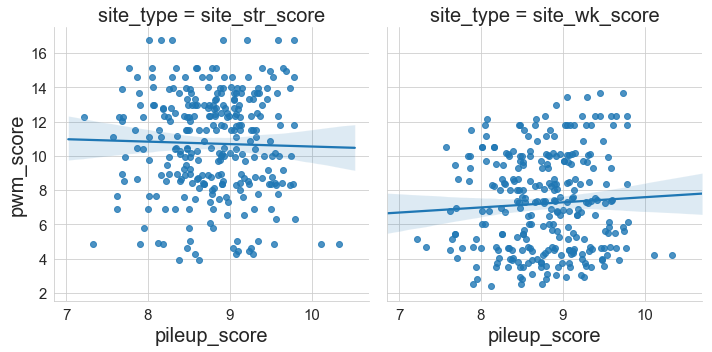

In [30]:
pwm_vs_chip_k562 = pd.melt(pwm_vs_chip_k562, id_vars=['Sequence', 'pileup_score'], 
                           value_vars=['site_str_score', 'site_wk_score'],
                           var_name='site_type', value_name='pwm_score')
sns.lmplot(x='pileup_score', y='pwm_score', col="site_type" , data=pwm_vs_chip_k562)